In [1]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np
import os

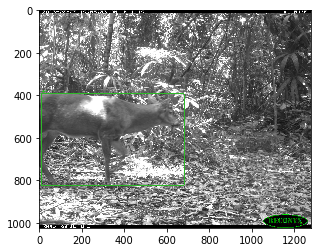

In [8]:
im = cv2.imread('C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\test\\8714ce80-21bc-11ea-a13a-137349068a90.jpg')
#im = cv2.imread(trainFiles[0])
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()




In [9]:
print(bbox)
print(label)
print(conf)

[[11, 393, 683, 823]]
['cow']
[0.9091830849647522]


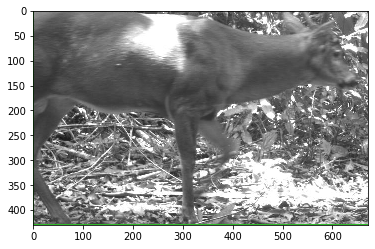

In [10]:

if(conf==[]):
    plt.imshow(im)
else:
    maxConf=np.argmax(conf)
    x,y,w,h = bbox[maxConf]
    plt.imshow(im[y:h,x:w])
plt.show()

In [2]:
rootPath="C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\"

#def getFileNames(path):
#    i=0
#    files=[]
#    for dirname, _, filenames in os.walk(path):
#            for filename in filenames:
#                #if(i<10):
#                #print(os.path.join(dirname, filename))
#                files.append(os.path.join(dirname, filename))
#                i=i+1
#                #else:
#                #    break
#                
#    print(str(i)+" files found!")
#    return files

def getFileNames(path):
    #return [os.path.join(path,f) for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    return [os.path.join(path,entry) for entry in os.scandir(path) if entry.is_file()]


testFiles = getFileNames(rootPath+"test")
trainFiles = getFileNames(rootPath+"train\\400X400")

#62894 files found!
#296155 files found!

In [12]:
#with os.scandir(rootPath+"train") as it:
#    for entry in it:
#        if not entry.name.startswith('.') and entry.is_file():
#            print(entry.name)


In [13]:
testFiles = getFileNames(rootPath+"test")
#trainFiles = getFileNames(rootPath+"train")


In [3]:
len(trainFiles)
#len(testFiles)


217960

In [15]:
def findObject(imgPath):
    found=0
    im = cv2.imread(imgPath)
    bbox, label, conf = cv.detect_common_objects(im)
    #output_image = draw_bbox(im, bbox, label, conf)
    #plt.imshow(output_image)
    #plt.show()
    #print(bbox)
    #print(label)
    #print(conf)
    if(conf==[]):
        #plt.imshow(im)
        found=0
    else:
        #maxConf=np.argmax(conf)
        #x,y,w,h = bbox[maxConf]
        #plt.imshow(im[y:h,x:w])
        found=1
    #plt.show()
    return found



In [10]:
findObject(trainFiles[6])

1

In [17]:
def findObject(imgPath):
    found=0
    im = cv2.imread(imgPath)
    bbox, label, conf = cv.detect_common_objects(im)
    del bbox, label, im
#    if(len(conf)==0):
#        found=0
#    else:
#        found=1
#    del conf
#    return found
    return (len(conf)>0)

In [19]:
searched=99500
images=22779 
for i, file in enumerate(trainFiles):
    if(i>=searched):
        images=images+findObject(file)
        if(i%500==0):
            print(str(i)+":" + str(images), end=" ")

99500:22779 100000:22878 100500:23000 101000:23117 101500:23217 102000:23329 102500:23440 103000:23548 103500:23658 104000:23781 104500:23922 105000:24015 105500:24125 106000:24240 106500:24351 107000:24466 107500:24574 108000:24671 108500:24792 109000:24923 109500:25059 110000:25175 110500:25288 111000:25420 111500:25530 112000:25648 112500:25764 113000:25883 113500:25985 114000:26109 114500:26221 115000:26351 115500:26482 116000:26597 116500:26718 117000:26837 117500:26958 118000:27078 118500:27202 119000:27310 119500:27427 120000:27539 120500:27652 121000:27751 121500:27871 122000:27984 122500:28097 123000:28210 123500:28313 124000:28445 124500:28569 125000:28682 125500:28794 126000:28906 126500:29022 127000:29137 127500:29255 128000:29371 128500:29475 129000:29585 129500:29707 130000:29815 130500:29919 131000:30057 131500:30173 132000:30304 132500:30422 133000:30538 133500:30664 134000:30765 134500:30877 135000:31002 135500:31128 136000:31240 136500:31352 137000:31462 137500:31586 

In [15]:
searched=99500
images=0
for i, file in enumerate(trainFiles):
    if(i>=searched):
        images=images+findObject(file)
        if(i%500==0):
            print(str(i)+":" + str(images), end=" ")

0:1 500:113 1000:219 1500:332 2000:443 2500:551 3000:676 3500:807 4000:924 4500:1057 5000:1175 5500:1298 6000:1397 6500:1512 7000:1639 7500:1768 8000:1877 8500:1986 9000:2103 9500:2216 10000:2336 10500:2478 11000:2586 11500:2706 12000:2822 12500:2945 13000:3069 13500:3174 14000:3299 14500:3404 15000:3512 15500:3634 16000:3751 16500:3872 17000:3975 17500:4097 18000:4202 18500:4306 19000:4415 19500:4517 20000:4637 20500:4759 21000:4869 21500:4985 22000:5092 22500:5208 23000:5314 23500:5418 24000:5542 24500:5658 25000:5779 25500:5895 26000:6001 26500:6106 27000:6220 27500:6341 28000:6463 28500:6576 29000:6686 29500:6786 30000:6898 30500:7012 31000:7138 31500:7238 32000:7373 32500:7497 33000:7630 33500:7738 34000:7856 34500:7968 35000:8086 35500:8188 36000:8312 36500:8420 37000:8534 37500:8659 38000:8758 38500:8886 39000:9003 39500:9129 40000:9245 40500:9355 41000:9475 41500:9590 42000:9713 42500:9820 43000:9926 43500:10038 44000:10154 44500:10275 45000:10387 45500:10508 46000:10609 46500:

KeyboardInterrupt: 

In [ ]:
print(images)

In [210]:


filetoProcess = trainFiles[6]

#image.thumbnail((400, 400))
#image.show()



In [16]:

from PIL import Image, ImageOps
import cv2

def detectAndResize(filetoProcess):
    ##Resizing Images using Pillow
    import cvlib as cv
    if(os.path.exists(rootPath+"/test/400X400/"+os.path.basename(filetoProcess))==False):
        image = Image.open(filetoProcess)
        im = cv2.imread(filetoProcess)
        bbox, label, conf = cv.detect_common_objects(im)
        if(conf==[]):
            found=0
        else:
            maxConf=np.argmax(conf)
            x,y,w,h = bbox[maxConf]
            #plt.imshow(im[y:h,x:w])
            found=1
            box = (x, y, w, h)
            image = image.crop(box)

        image.thumbnail((400, 400))
        w,h=image.size

        padding = (0, 0, 400-w, 400-h)
        image = ImageOps.expand(image, padding)
        image.save(rootPath+"/test/400X400/"+os.path.basename(filetoProcess))

#image.show()

In [ ]:
for file in trainFiles:
    try:
        detectAndResize(file)
    except:
        print("Issue with file " + file)

Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\86843140-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\86878bec-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8687ae88-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8687c22e-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8687cddc-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8687dffc-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8687e740-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8687eab0-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\P

In [228]:
os.path.exists(rootPath+"/train/400X400/"+os.path.basename(filetoProcess))

True

In [20]:
for file in testFiles:
    try:
        detectAndResize(file)
    except:
        print("Issue with file " + file)